* Education        
 - 'Below College'                     
 - 'College'                             
 - 'Bachelor'
 - 'Master'
 - 'Doctor'
* EnvironmentSatisfaction
 - 'Low'
 - 'Medium'
 - 'High'
 - 'Very High'
* JobInvolvement  
 - 'Low'
 - 'Medium'
 - 'High'
 - 'Very High'
* JobSatisfaction  
 - 'Low'
 - 'Medium'
 - 'High'
 - 'Very High'
 * PerformanceRating  
 - 'Low'
 - 'Good'
 - 'Excellent'
 - 'Outstanding'
* RelationshipSatisfaction  
 - 'Low'
 - 'Medium'
 - 'High'
 - 'Very High'
* WorkLifeBalance  
 - 'Bad'
 - 'Good'
 - 'Better'
 - 'Best'
* RemoteWork
  - ‘on-site work’
  - ‘full remote’
* Incentive : rewards for performance


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/comp/comp3/company_i

/content/drive/MyDrive/comp/comp3/company_i


In [3]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c11d0c0fa909afece2d6c43a4815509b2b9a5ef24726ca0c9b598da58f93b547
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [4]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import japanize_matplotlib as plt
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

In [6]:
# セルの横幅を広げる
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [19]:
data = pd.read_csv('data.csv')

In [8]:
data_copy = data.copy()

In [20]:
data = data.drop(['Over18',"StandardHours","EmployeeCount"], axis=1)

In [23]:
data.replace('No',0, inplace=True)
data.replace('Yes',1, inplace=True)
data.replace('Male',0, inplace=True)
data.replace('Female',1, inplace=True)

In [10]:
le = LabelEncoder()

encode_columns= ['BusinessTravel','Department','EducationField','MaritalStatus','HowToEmploy']
for column in encode_columns:
  data[column] = le.fit_transform(data[column])

data.replace('Sales Executive',0,inplace=True)
data.replace('Research Scientist',1,inplace=True)
data.replace('Laboratory Technician',2,inplace=True)
data.replace('Manufacturing Director',3,inplace=True)
data.replace('Healthcare Representative',4,inplace=True)
data.replace('Manager',5,inplace=True)
data.replace('Sales Representative',6,inplace=True)
data.replace('Research Director',7,inplace=True)
data.replace('Human Resources',8,inplace=True)

In [11]:
data_copy['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [12]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyAchievement            0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyAchievement           0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyAchievement          0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
HowToEmploy                 0
Incentive 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyAchievement          1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyAchievement         1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Attrition'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Attrition ')
ax[0].set_ylabel('')
sns.countplot(x=data['Attrition'],ax=ax[1])
ax[1].set_title('Attrition')
plt.show()

AttributeError: module 'japanize_matplotlib' has no attribute 'subplots'

In [ ]:
from sklearn.model_selection import train_test_split

target = data['Attrition']
explain = data.drop(['Attrition'], axis=1)

trainx, testx, trainy, testy = train_test_split(explain, target, test_size=0.2, random_state=1)


In [ ]:
rf = LGBMClassifier(importance_type='gain')
rf.fit(trainx, trainy)

print(rf.score(testx, testy))
importance = rf.feature_importances_

[LightGBM] [Info] Number of positive: 181, number of negative: 995
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1659
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153912 -> initscore=-1.704246
[LightGBM] [Info] Start training from score -1.704246
0.8469387755102041


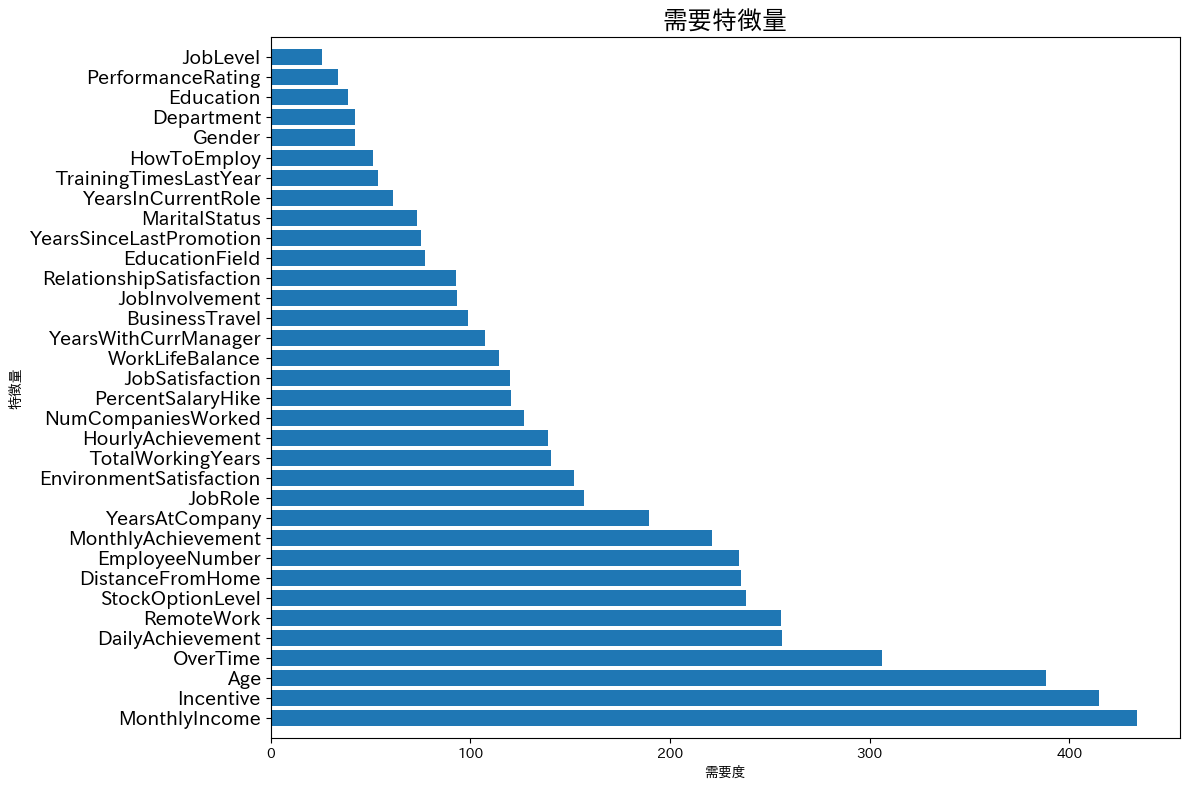

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'importance' is already calculated as rf.feature_importances_
feature_names = trainx.columns  # Replace with the actual feature names

# Sort feature importances and names in descending order
sorted_indices = np.argsort(importance)[::-1]
importance = importance[sorted_indices]
feature_names = feature_names[sorted_indices]

plt.figure(figsize=(12, 8))  # Increase figure size
plt.title("需要特徴量", fontsize=18)  # Increase title font size
plt.ylabel('特徴量')
plt.xlabel('需要度')
plt.barh(range(trainx.shape[1]), importance, align='center')
plt.yticks(range(trainx.shape[1]), feature_names, fontsize=14)  # Increase y-tick font size
plt.ylim([-1, trainx.shape[1]])
plt.tight_layout()
plt.show()

In [12]:
data['Age_bin'] = pd.cut(data['Age'], bins=range(15, 70, 5), labels=[f"{i}-{i+4}" for i in range(15, 65, 5)])

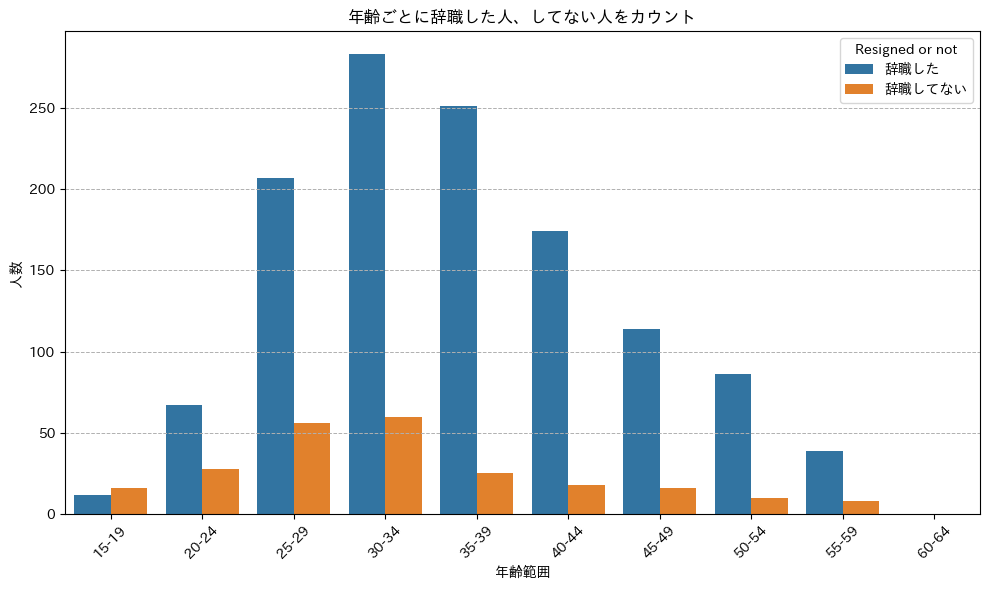

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_bin', hue='Attrition', data=data)
plt.xlabel('年齢範囲')
plt.ylabel('人数')
plt.title('年齢ごとに辞職した人、してない人をカウント')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['辞職した', '辞職してない']
plt.legend(handles, labels, title='Resigned or not', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Age_binとAttritionでグループ化し、レコード数をカウント
attrition_counts = data.groupby(['Age_bin', 'Attrition'])['Attrition'].count().unstack()

# Age_binごとにAttritionが1である割合を計算
attrition_rate = attrition_counts[1] / (attrition_counts[0] + attrition_counts[1])

# 結果を表示
print(attrition_rate)

Age_bin
15-19    0.571429
20-24    0.294737
25-29    0.212928
30-34    0.174927
35-39    0.090580
40-44    0.093750
45-49    0.123077
50-54    0.104167
55-59    0.170213
60-64         NaN
dtype: float64


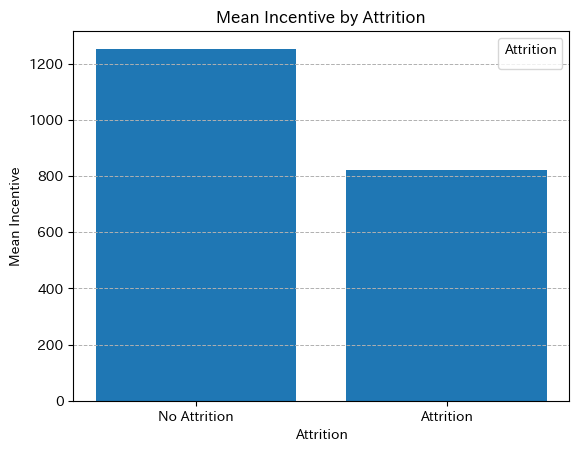

In [ ]:
import matplotlib.pyplot as plt

# Attrition別にincentiveの平均値を計算
mean_incentive = data.groupby('Attrition')['Incentive'].mean()

# 棒グラフを作成
plt.bar(mean_incentive.index, mean_incentive.values)
plt.xlabel('Attrition')
plt.ylabel('Mean Incentive')
plt.title('Mean Incentive by Attrition')
plt.legend(title='Attrition', loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.xticks([0, 1], ['No Attrition', 'Attrition'])  # x軸のラベルを分かりやすく変更
plt.show()

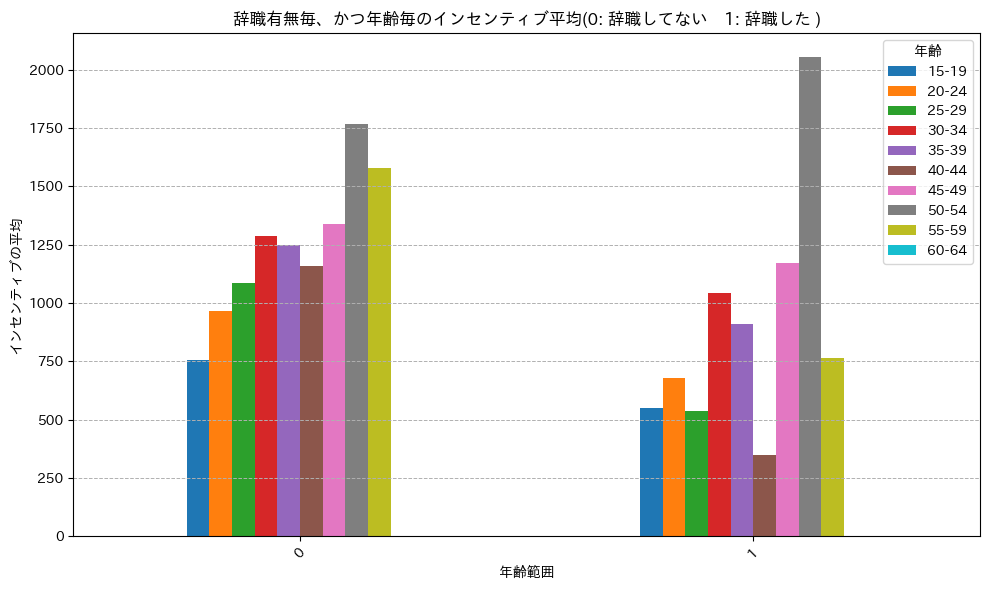

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 年齢を5歳区切りにbinning
data['Age_bin'] = pd.cut(data['Age'], bins=range(15, 70, 5), labels=[f"{i}-{i+4}" for i in range(15, 65, 5)])

# Attritionと年齢bin別にincentiveの平均値を計算
mean_incentive = data.groupby(['Attrition', 'Age_bin'])['Incentive'].mean().unstack()

# グループ化された棒グラフを作成
mean_incentive.plot(kind='bar', figsize=(10, 6))
plt.xlabel('年齢範囲')
plt.ylabel('インセンティブの平均')
plt.title('辞職有無毎、かつ年齢毎のインセンティブ平均(0: 辞職してない　1: 辞職した )')
plt.xticks(rotation=45)
labels = ['辞職した', '辞職してない']
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='年齢', loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

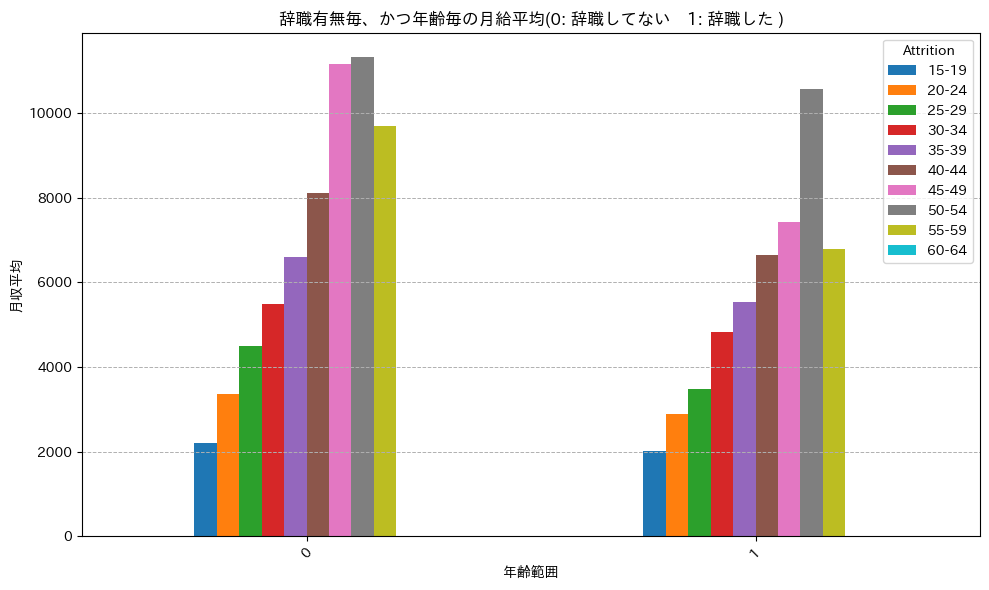

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 年齢を5歳区切りにbinning
data['Age_bin'] = pd.cut(data['Age'], bins=range(15, 70, 5), labels=[f"{i}-{i+4}" for i in range(15, 65, 5)])

# Attritionと年齢bin別にMonthlyIncomeの平均値を計算
mean_income = data.groupby(['Attrition', 'Age_bin'])['MonthlyIncome'].mean().unstack()

# グループ化された棒グラフを作成
mean_income.plot(kind='bar', figsize=(10, 6))
plt.xlabel('年齢範囲')
plt.ylabel('月収平均')
plt.title('辞職有無毎、かつ年齢毎の月給平均(0: 辞職してない　1: 辞職した )')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')

# 補助線を追加
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


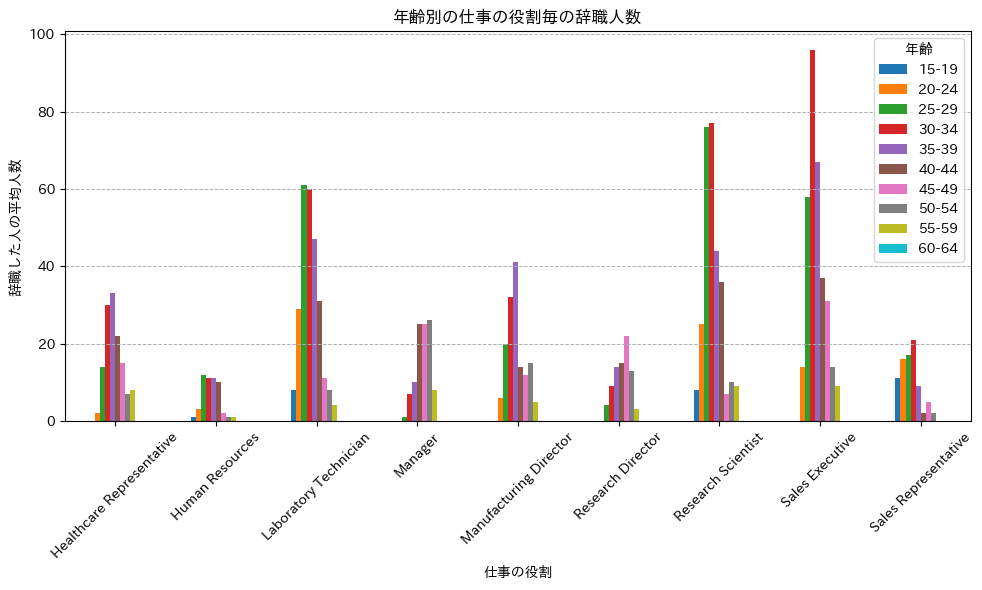

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
data['Age_bin'] = pd.cut(data['Age'], bins=range(15, 70, 5), labels=[f"{i}-{i+4}" for i in range(15, 65, 5)])

# Attritionと年齢bin別にMonthlyIncomeの平均値を計算
mean_income = data.groupby(['JobRole','Age_bin'])['Attrition'].count().unstack()

# グループ化された棒グラフを作成
mean_income.plot(kind='bar', figsize=(10, 6))
plt.xlabel('仕事の役割')
plt.ylabel('辞職した人の平均人数')
plt.title('年齢別の仕事の役割毎の辞職人数')
plt.xticks(rotation=45)
# labels = ['辞職した', '辞職してない']
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='年齢', loc='upper right')


# 補助線を追加
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


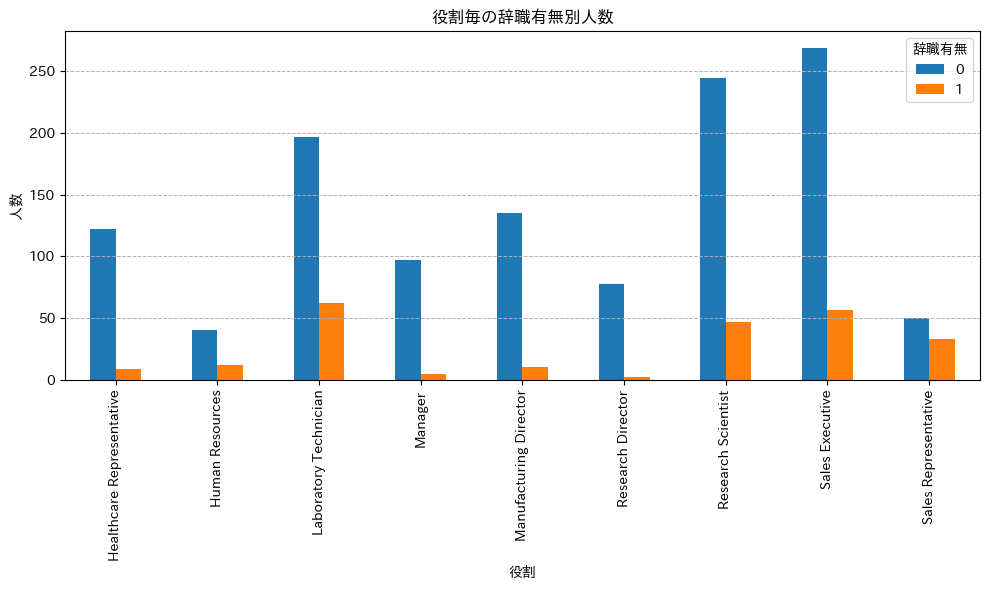

In [62]:
data.groupby(['JobRole', 'Attrition'])['Attrition'].count().unstack().plot(kind='bar', figsize=(10, 6))
plt.title('役割毎の辞職有無別人数')
plt.xlabel('役割')
plt.ylabel('人数')
plt.legend(title='辞職有無', loc='upper right')
# 補助線を追加
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

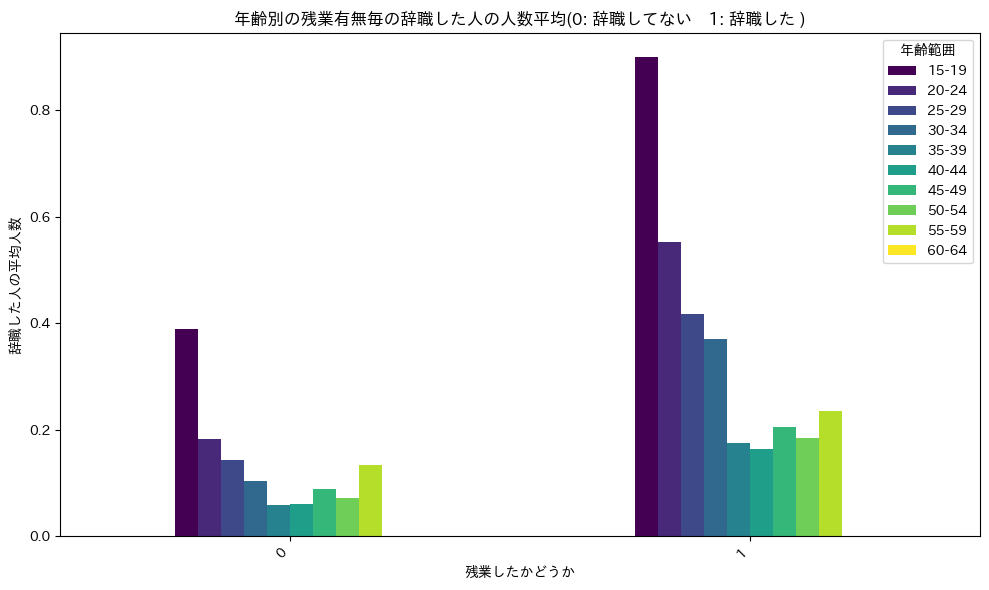

In [52]:
import matplotlib.pyplot as plt

# Calculate mean attrition by OverTime and Age_bin
mean_attrition = data.groupby(["OverTime", 'Age_bin'])['Attrition'].mean().unstack()

# Plot with color differentiation
mean_attrition.plot(kind='bar', figsize=(10, 6), colormap='viridis')  # Use a colormap for distinct colors

plt.xlabel('残業したかどうか')
plt.ylabel('辞職した人の平均人数')
plt.title('年齢別の残業有無毎の辞職した人の人数平均(0: 辞職してない　1: 辞職した )')
plt.xticks(rotation=45, ha='right')
plt.legend(title='年齢範囲')
plt.tight_layout()
plt.show()

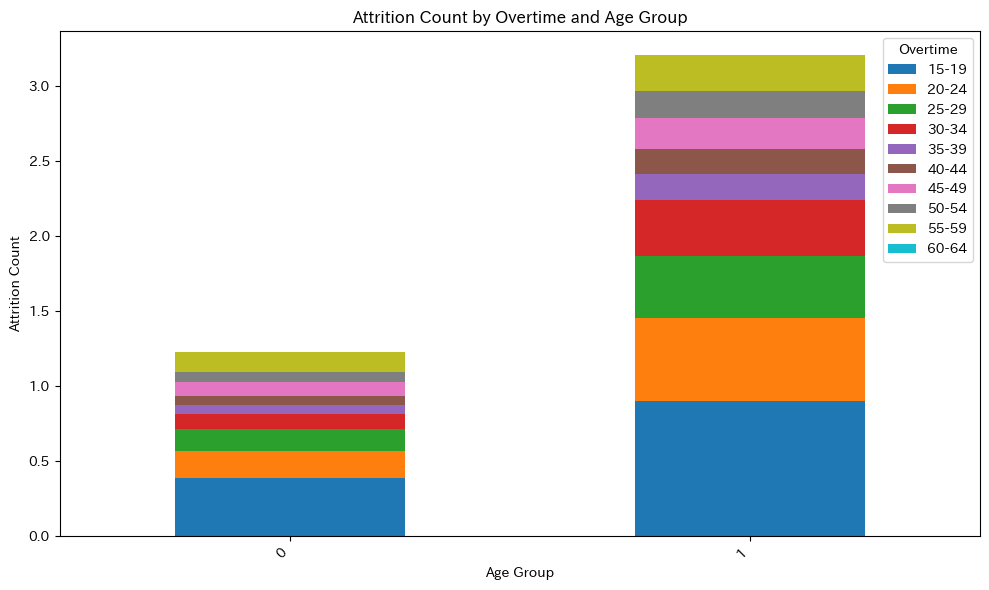

In [49]:
import matplotlib.pyplot as plt

# Count attrition by OverTime and Age_bin
attrition_counts = data.groupby(["OverTime", 'Age_bin'])['Attrition'].mean().unstack()

# Plot the two groups as stacked bars
attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Age Group')
plt.ylabel('Attrition Count')
plt.title('Attrition Count by Overtime and Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Overtime')
plt.tight_layout()
plt.show()

In [41]:
|mean_attrition = data.groupby(['role'])["OverTime"].count()

KeyError: 'role'

In [ ]:
data_copy['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

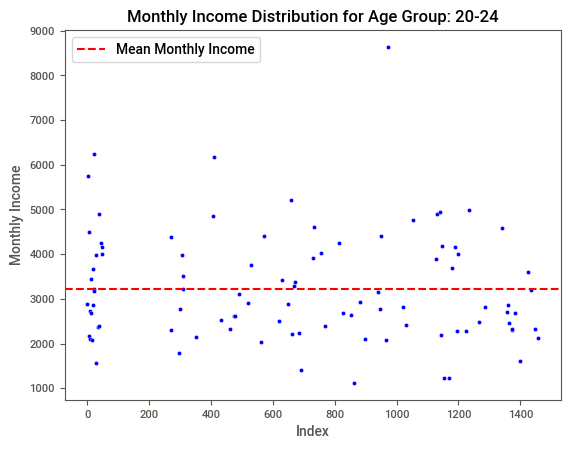

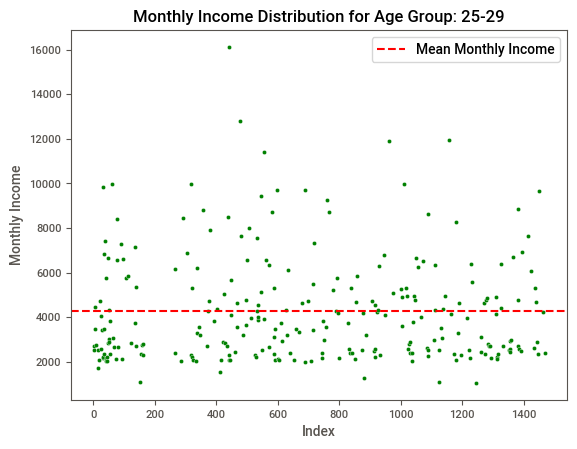

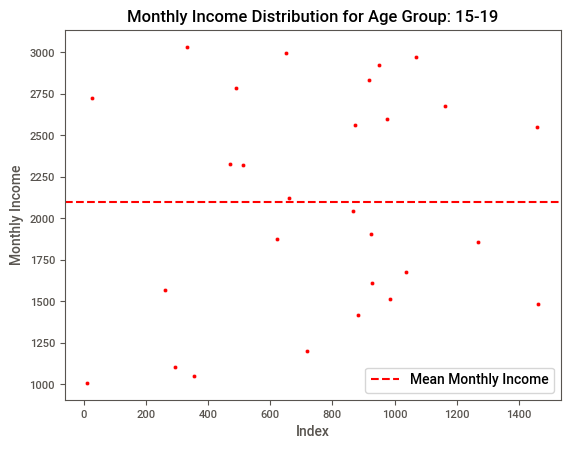

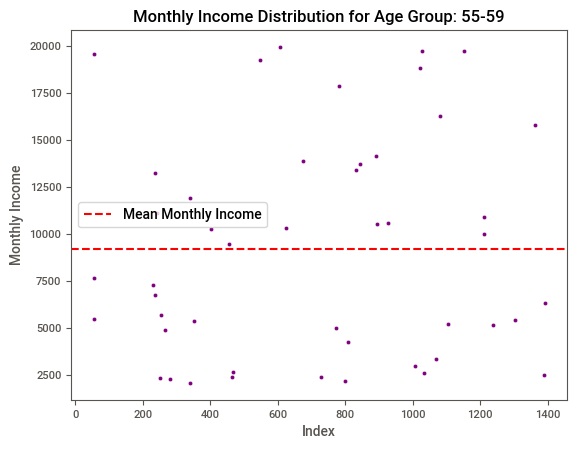

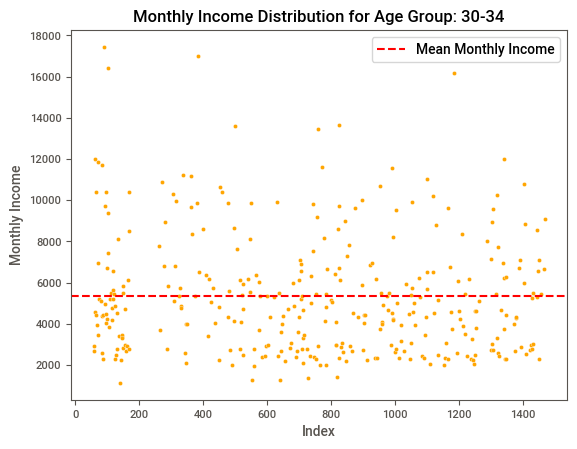

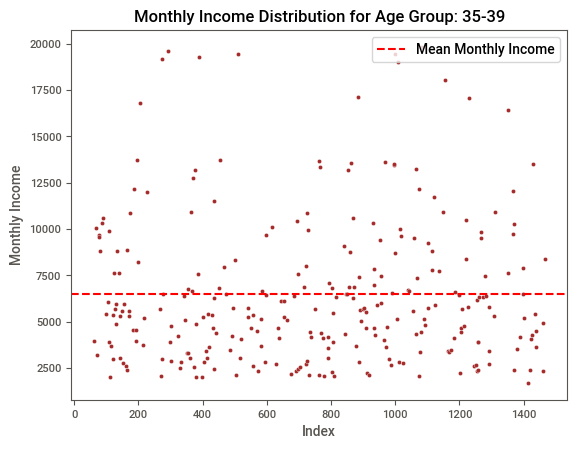

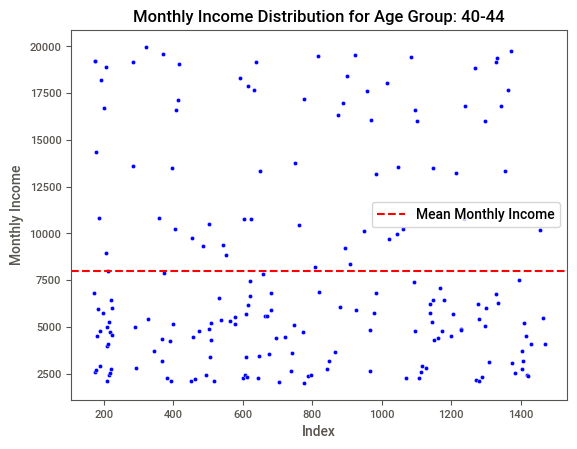

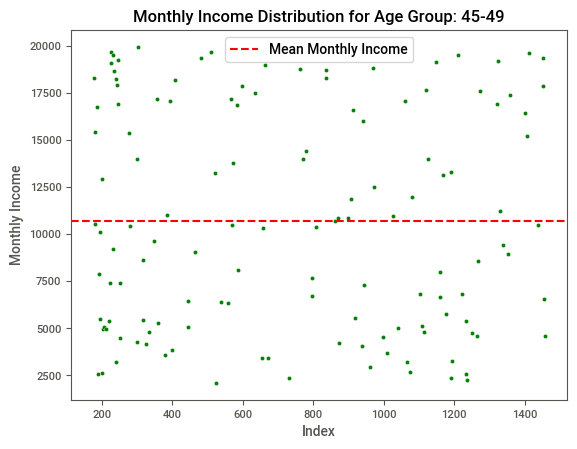

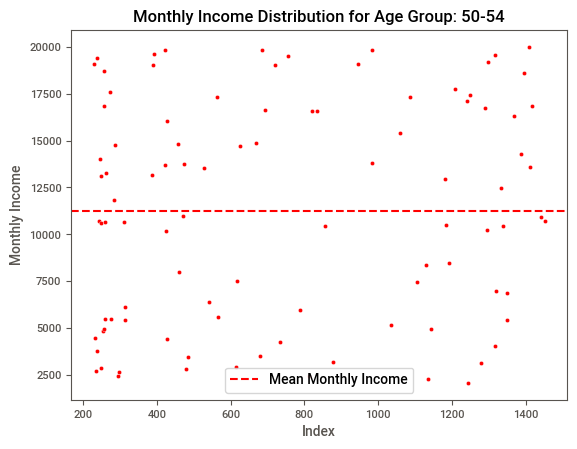

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age_bin ごとにデータを分割
age_bins = data['Age_bin'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']  # 各 Age_bin に使用する色

# 各 Age_bin ごとにプロットを作成
for i, age_bin in enumerate(age_bins):
    subset = data[data['Age_bin'] == age_bin]
    plt.figure()  # 新しい図を作成
    sns.scatterplot(x=subset.index, y=subset['MonthlyIncome'], color=colors[i % len(colors)])
    plt.axhline(y=subset['MonthlyIncome'].mean(), color='r', linestyle='--', label='Mean Monthly Income')
    plt.xlabel('Index')
    plt.ylabel('Monthly Income')
    plt.title(f'Monthly Income Distribution for Age Group: {age_bin}')
    plt.legend()
    plt.show()

In [ ]:
data.groupby('Age_bin')['OverTime'].mean()

Age_bin
15-19    0.357143
20-24    0.305263
25-29    0.254753
30-34    0.268222
35-39    0.268116
40-44    0.317708
45-49    0.300000
50-54    0.281250
55-59    0.361702
60-64         NaN
Name: OverTime, dtype: float64

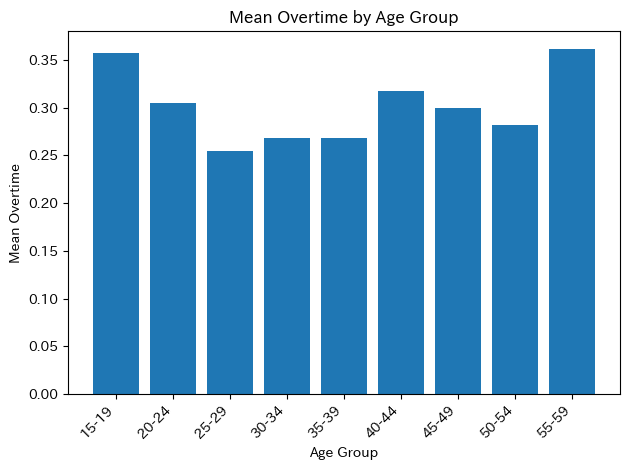

In [48]:
import matplotlib.pyplot as plt

# Calculate the mean overtime by age bin
mean_overtime = data.groupby('Age_bin')['OverTime'].mean()

# Create a bar plot
plt.bar(mean_overtime.index, mean_overtime.values)
plt.xlabel('Age Group')
plt.ylabel('Mean Overtime')
plt.title('Mean Overtime by Age Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 年齢層別に平均残業時間を計算
mean_overtime = data.groupby(['Age_bin','Attrition'])['OverTime'].mean().unstack() # Attritionを列に変換

# 棒グラフを作成
mean_overtime.plot(kind='bar', figsize=(10, 6))
plt.xlabel('年齢層')
plt.ylabel('平均残業時間')
plt.title('年齢層と退職別の平均残業時間')
plt.xticks(rotation=45, ha='right')  # 可読性のためにx軸ラベルを回転
plt.legend(title='退職')
plt.tight_layout()  # ラベルが重ならないようにレイアウトを調整
# 補助線を追加
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

KeyError: 'Age_bin'

In [53]:
data['JobRole'].unique()

array(['Research Scientist', 'Sales Executive', 'Laboratory Technician',
       'Sales Representative', 'Human Resources',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Research Director'], dtype=object)

In [ ]:
data.groupby('JobRole')['OverTime'].mean()

JobRole
0    0.288344
1    0.332192
2    0.239382
3    0.268966
4    0.282443
5    0.264706
6    0.289157
7    0.287500
8    0.250000
Name: OverTime, dtype: float64

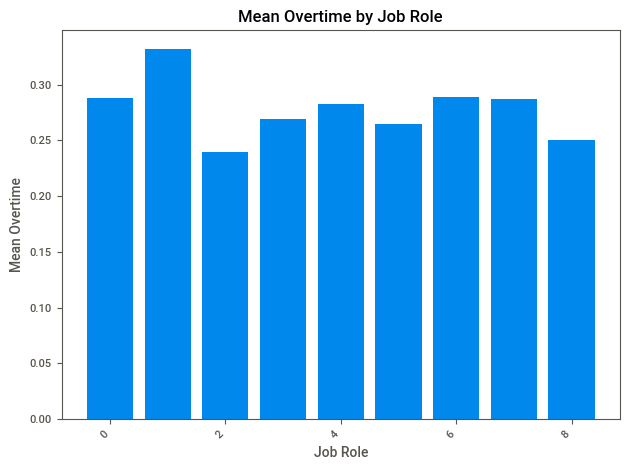

In [ ]:
import matplotlib.pyplot as plt
# Calculate the mean overtime by job role
mean_overtime = data.groupby('JobRole')['OverTime'].mean()

# Create a bar plot
plt.bar(mean_overtime.index, mean_overtime.values)
plt.xlabel('Job Role')
plt.ylabel('Mean Overtime')
plt.title('Mean Overtime by Job Role')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

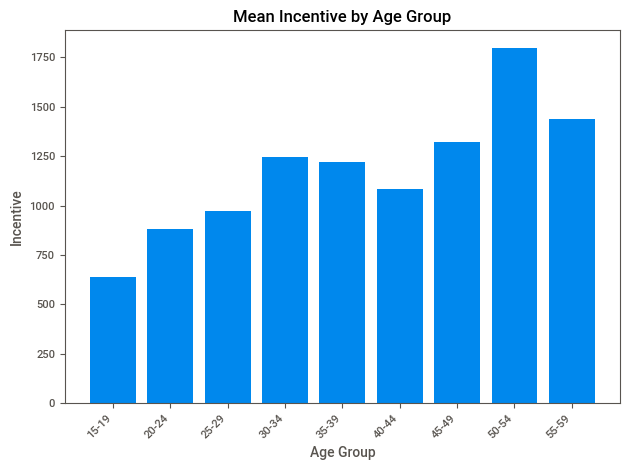

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean overtime by age bin
mean_overtime = data.groupby('Age_bin')['Incentive'].mean()

# Create a bar plot
plt.bar(mean_overtime.index, mean_overtime.values)
plt.xlabel('Age Group')
plt.ylabel('Incentive')
plt.title('Mean Incentive by Age Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

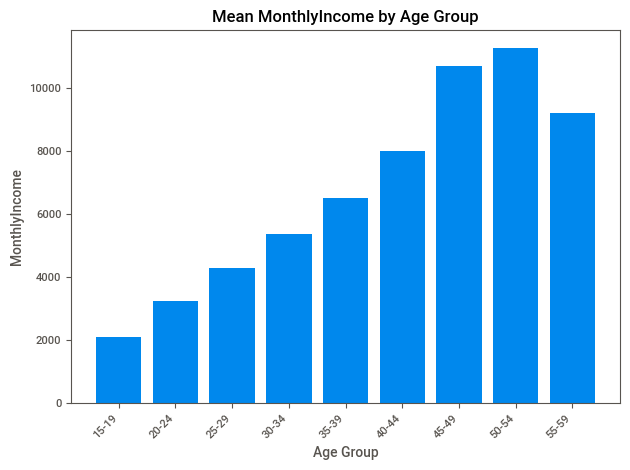

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean overtime by age bin
mean_overtime = data.groupby('Age_bin')['MonthlyIncome'].mean()

# Create a bar plot
plt.bar(mean_overtime.index, mean_overtime.values)
plt.xlabel('Age Group')
plt.ylabel('MonthlyIncome')
plt.title('Mean MonthlyIncome by Age Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
data.describe()

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,1.204762,1183.386395,2.824490
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,1.695982,1429.687536,1.229521
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,727.500000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,2.000000,1817.000000,4.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,5.000000,8584.000000,5.000000


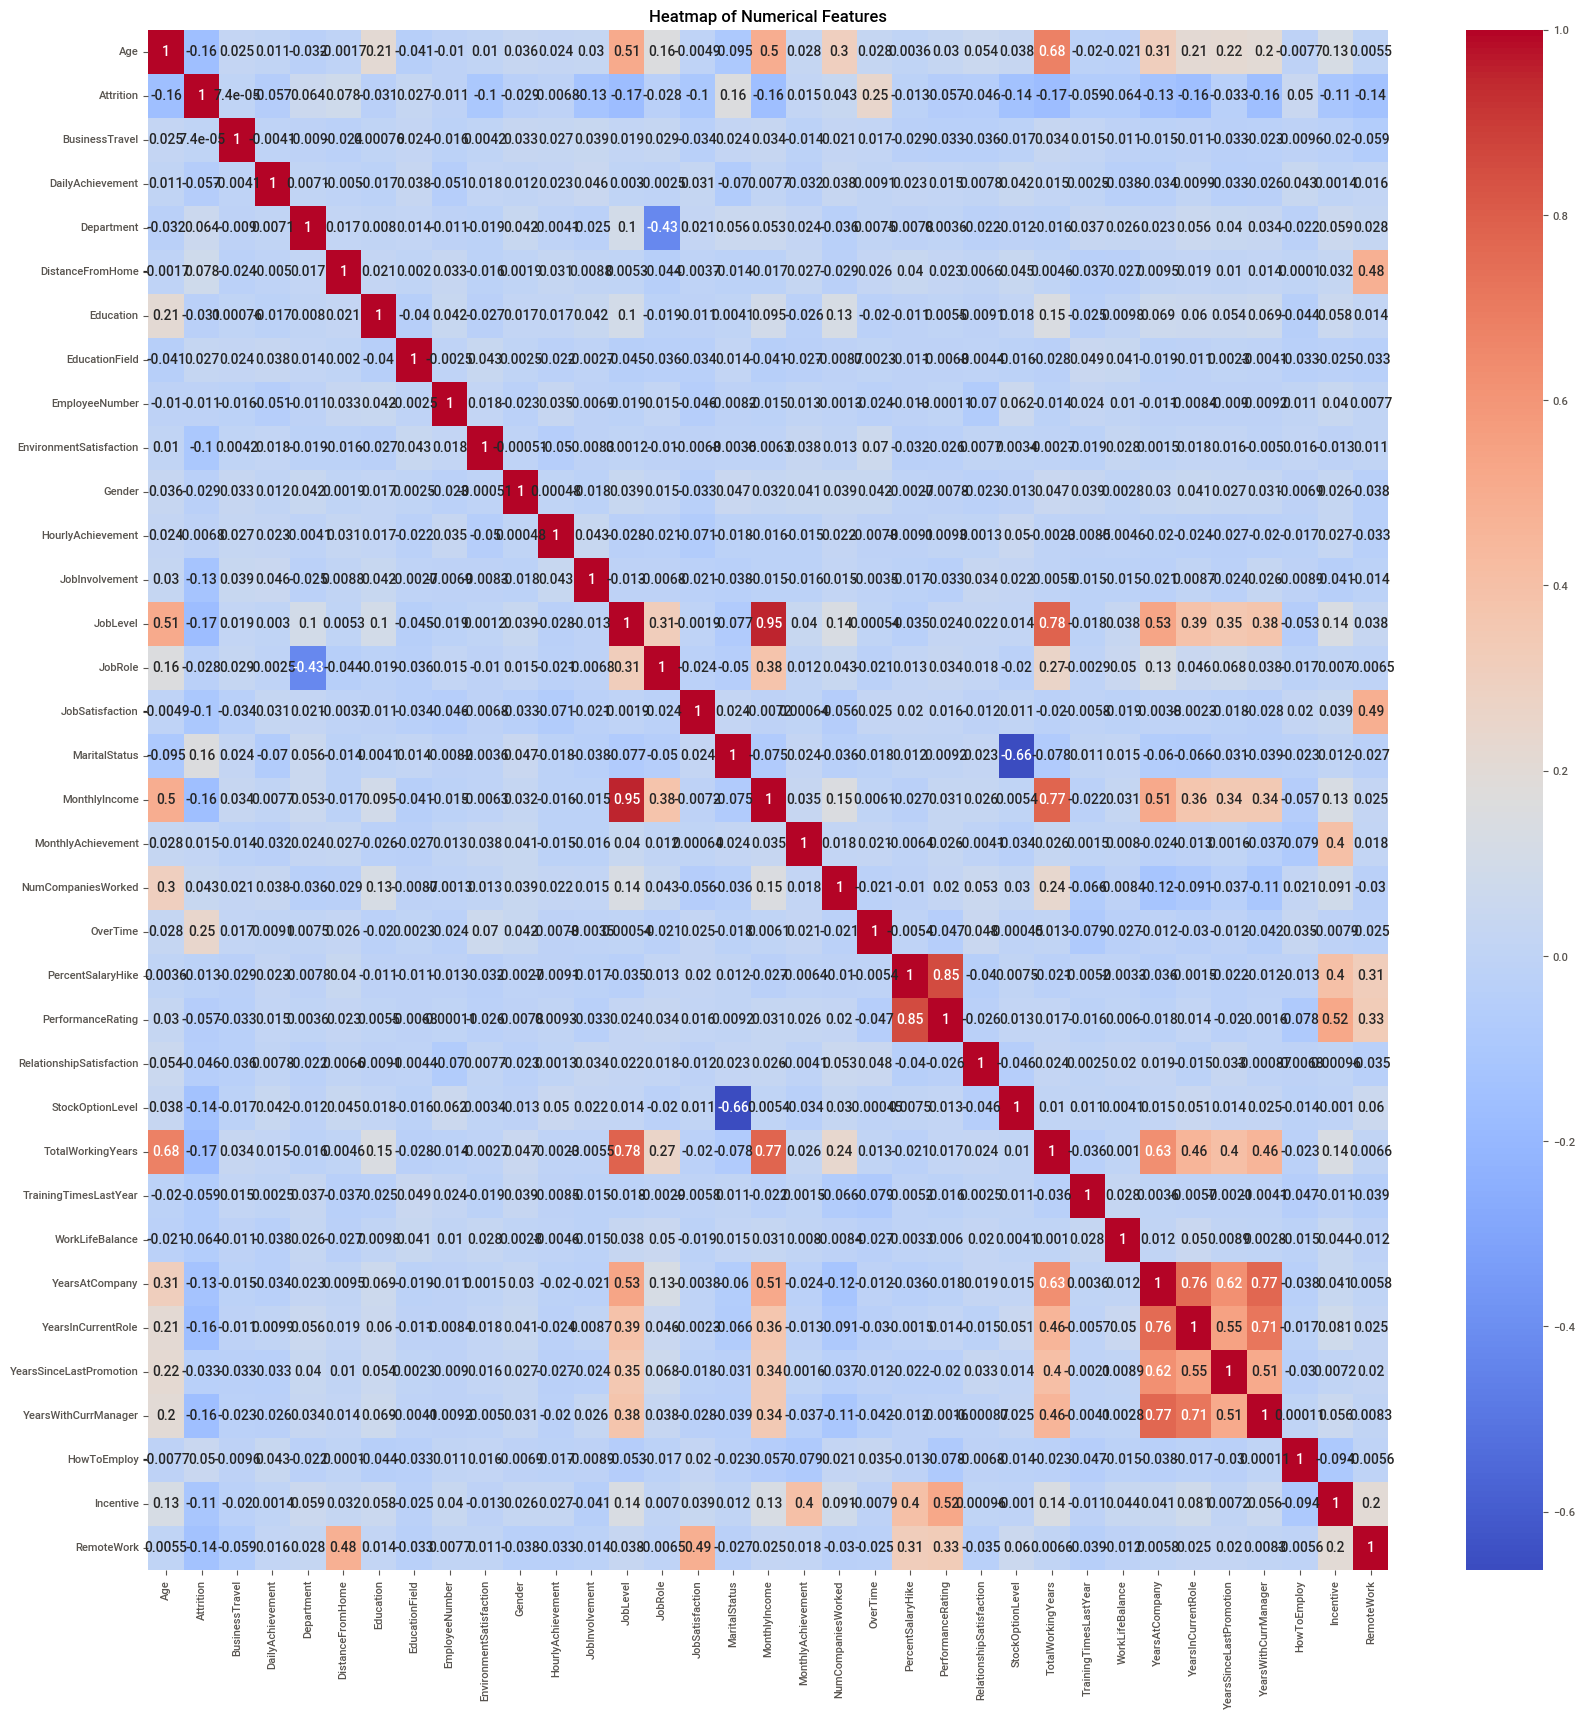

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Create a heatmap
plt.figure(figsize=(20, 20))  # Adjust figure size as needed
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Features')
plt.show()

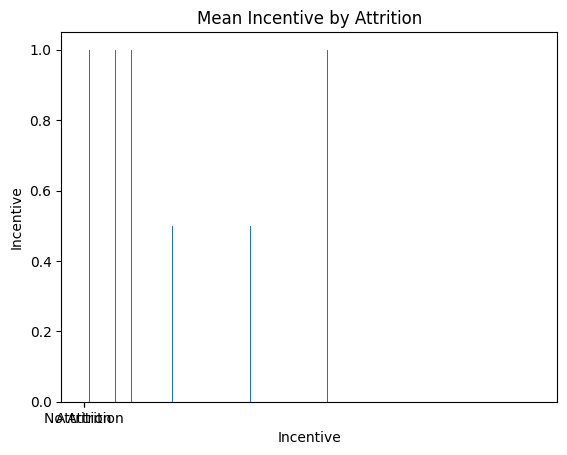

In [ ]:
import matplotlib.pyplot as plt

# Attrition別にincentiveの平均値を計算
mean_incentive = data.groupby('Attrition')['OverTime'].mean()

# 棒グラフを作成
plt.bar(mean_incentive.index, mean_incentive.values)
plt.xlabel('Attrition')
plt.ylabel('overtime')
plt.title('Mean OverTime by Attrition')
plt.xticks([0, 1], ['No Attrition', 'Attrition'])  # x軸のラベルを分かりやすく変更
plt.show()

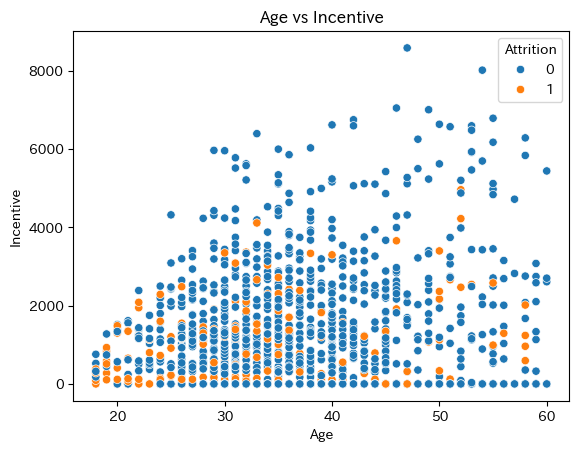

In [ ]:
sns.scatterplot(data=data, x='Age', y='Incentive', hue='Attrition')
plt.xlabel('Age')
plt.ylabel('Incentive')
plt.title('Age vs Incentive')
plt.show()

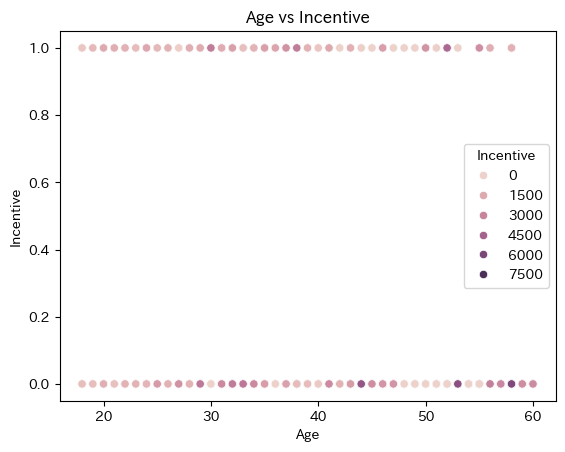

In [ ]:
sns.scatterplot(data=data, x='Age', y='Attrition', hue='Incentive')
plt.xlabel('Age')
plt.ylabel('Incentive')
plt.title('Age vs Incentive')
plt.show()

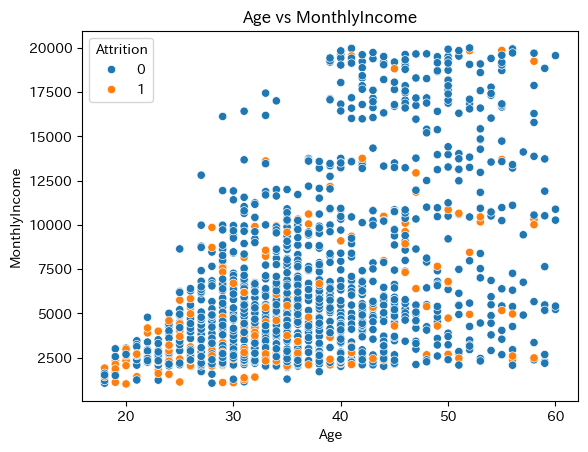

In [ ]:
sns.scatterplot(data=data, x='Age', y='MonthlyIncome', hue='Attrition')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.title('Age vs MonthlyIncome')
plt.show()

In [ ]:
data.groupby(['Attrition','Age'])['PerformanceRating'].mean()

Attrition  Age
0          18     2.500000
           19     3.000000
           20     2.600000
           21     2.142857
           22     3.090909
                    ...   
1          52     3.333333
           53     2.500000
           55     2.666667
           56     2.000000
           58     2.800000
Name: PerformanceRating, Length: 82, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean overtime by age bin
data.groupby(['Attrition','Age'])['PerformanceRating'].mean()

Attrition  Age
0          18     2.500000
           19     3.000000
           20     2.600000
           21     2.142857
           22     3.090909
                    ...   
1          52     3.333333
           53     2.500000
           55     2.666667
           56     2.000000
           58     2.800000
Name: PerformanceRating, Length: 82, dtype: float64

<Axes: xlabel='Attrition'>

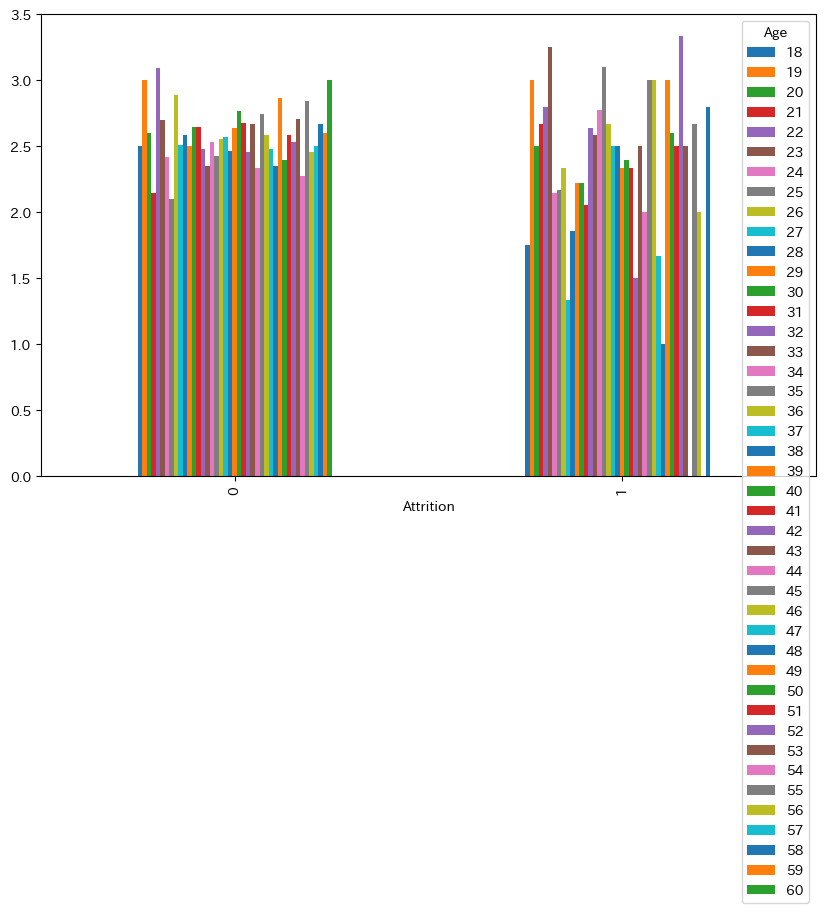

In [ ]:
import matplotlib.pyplot as plt

# AttritionとAgeでグループ化されたPerformanceRatingの平均値を計算
data.groupby(['Attrition', 'Age'])['PerformanceRating'].mean().unstack().plot(kind='bar', figsize=(10, 6))